# Data analisis de chancadora primaria

In [2]:
import os                       #Para Direccionar la ruta de trabajo
import pandas as pd             #Para trabajar con DataFrames
import numpy as np              #Para manejo de arrays
import matplotlib.pyplot as plt #Para manejo de gráficos
import seaborn as sns           #Para manejo de gráficos

from sklearn.model_selection import train_test_split  #Particionamiento de Datos
from sklearn.preprocessing import LabelEncoder        #Codificación de etiquetas
from collections import defaultdict                   #Para generar un diccionario con valor por defecto
from sklearn.impute import SimpleImputer              #Para llevar a cabo imputaciones univariadas o simples
from sklearn.linear_model import LinearRegression     #Para imputación por regresión
from sklearn import tree                              #Para imputación por árboles

import datetime

#Just in Case
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Tema/color de gráficos
sns.set_style('darkgrid')
sns.color_palette('dark') 

[(0.0, 0.10980392156862745, 0.4980392156862745),
 (0.6941176470588235, 0.25098039215686274, 0.050980392156862744),
 (0.07058823529411765, 0.44313725490196076, 0.10980392156862745),
 (0.5490196078431373, 0.03137254901960784, 0.0),
 (0.34901960784313724, 0.11764705882352941, 0.44313725490196076),
 (0.34901960784313724, 0.1843137254901961, 0.050980392156862744),
 (0.6352941176470588, 0.20784313725490197, 0.5098039215686274),
 (0.23529411764705882, 0.23529411764705882, 0.23529411764705882),
 (0.7215686274509804, 0.5215686274509804, 0.0392156862745098),
 (0.0, 0.38823529411764707, 0.4549019607843137)]

In [4]:
#Establecer nuestro directorio de trabajo
os.chdir(r'D:\01data\Machine Learning primario')

In [5]:
df= pd.read_csv("df_merge_full_filtered.csv",  sep=',')
df=pd.DataFrame(df)
df.head(10)

,Unnamed: 0,TimeStamp,C2_3110_ZI_30107.VAR_ALARM,C2_3110_ZI_31110.VAR_ALARM,C2_3110_HY_001.YC_LOWER,C2_3110_HY_001.YC_RAISE,C2_3110_HY_004.YC_LOWER,C2_3110_HY_004.YC_RAISE,C2_3110_PL_014.RUN_STATUS,C2_3110_PL_015.RUN_STATUS,...,C2_3100_CR1.UCS,C2_3110_ZI_31110,C2_3110_TI_31520,C2_3120_WIC_00710.PV,C2_3110_TI_31105,C2_3110_TI_31106,C2_3110_FI_31103,C2_3110_FI_31101,C2_3110_FI_31102,C2_3100_CR2.UCS
0,1020501,2019-12-11 16:23:00,0,0,0,0,0,0,0,0,...,248.0,72.27083,39.96695,8304.104,53.35668,54.10269,178.7908,171.2360,25.72391,248.0
1,1020502,2019-12-11 16:24:00,0,0,0,0,0,0,0,0,...,248.0,72.27083,37.93398,8574.638,53.35976,54.10141,170.8582,180.2247,24.61535,248.0
2,1020503,2019-12-11 16:25:00,0,0,0,0,0,0,0,0,...,248.0,72.27083,36.83608,8707.161,53.36283,54.10013,177.2351,173.0497,25.18670,248.0
3,1020504,2019-12-11 16:26:00,0,0,0,0,0,0,0,0,...,248.0,72.26356,39.33718,8894.159,53.36591,54.09885,176.2868,174.9993,26.79011,248.0
4,1020505,2019-12-11 16:27:00,0,0,0,0,0,0,0,0,...,248.0,72.25629,43.11185,8434.811,53.36898,54.09756,175.6371,174.7993,25.16393,248.0
5,1020506,2019-12-11 16:28:00,0,0,0,0,0,0,0,0,...,248.0,72.26356,39.67222,8442.753,53.37206,54.09628,176.9043,173.9545,25.24701,248.0
6,1020507,2019-12-11 16:29:00,0,0,0,0,0,0,0,0,...,248.0,72.26356,37.78336,8480.965,53.37514,54.09500,177.1493,176.5462,24.87664,248.0
7,1020508,2019-12-11 16:30:00,0,0,0,0,0,0,0,0,...,248.0,72.26356,37.02209,8403.502,53.37822,54.09372,176.8526,170.4633,25.90085,248.0
8,1020509,2019-12-11 16:31:00,0,0,0,0,0,0,0,0,...,248.0,72.25629,38.91768,8283.973,53.38129,54.09244,174.7945,176.1199,27.07815,248.0
9,1020510,2019-12-11 16:32:00,0,0,0,0,0,0,0,0,...,248.0,72.26356,42.99824,8436.773,53.38437,54.09116,171.1896,178.5671,26.19076,248.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706735 entries, 0 to 706734
Data columns (total 55 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Unnamed: 0                           706735 non-null  int64  
 1   TimeStamp                            706735 non-null  object 
 2   C2_3110_ZI_30107.VAR_ALARM           706735 non-null  int64  
 3   C2_3110_ZI_31110.VAR_ALARM           706735 non-null  int64  
 4   C2_3110_HY_001.YC_LOWER              706735 non-null  int64  
 5   C2_3110_HY_001.YC_RAISE              706735 non-null  int64  
 6   C2_3110_HY_004.YC_LOWER              706735 non-null  int64  
 7   C2_3110_HY_004.YC_RAISE              706735 non-null  int64  
 8   C2_3110_PL_014.RUN_STATUS            706735 non-null  int64  
 9   C2_3110_PL_015.RUN_STATUS            706735 non-null  int64  
 10  C2_3110_PL_013.RUN_STATUS            706735 non-null  int64  
 11  C2_3110_PL_01

In [7]:
df['TimeStamp']=pd.to_datetime(df['TimeStamp'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706735 entries, 0 to 706734
Data columns (total 55 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   Unnamed: 0                           706735 non-null  int64         
 1   TimeStamp                            706735 non-null  datetime64[ns]
 2   C2_3110_ZI_30107.VAR_ALARM           706735 non-null  int64         
 3   C2_3110_ZI_31110.VAR_ALARM           706735 non-null  int64         
 4   C2_3110_HY_001.YC_LOWER              706735 non-null  int64         
 5   C2_3110_HY_001.YC_RAISE              706735 non-null  int64         
 6   C2_3110_HY_004.YC_LOWER              706735 non-null  int64         
 7   C2_3110_HY_004.YC_RAISE              706735 non-null  int64         
 8   C2_3110_PL_014.RUN_STATUS            706735 non-null  int64         
 9   C2_3110_PL_015.RUN_STATUS            706735 non-null  int64         
 

In [9]:
df=df.drop(axis=1,columns='Unnamed: 0')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706735 entries, 0 to 706734
Data columns (total 54 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   TimeStamp                            706735 non-null  datetime64[ns]
 1   C2_3110_ZI_30107.VAR_ALARM           706735 non-null  int64         
 2   C2_3110_ZI_31110.VAR_ALARM           706735 non-null  int64         
 3   C2_3110_HY_001.YC_LOWER              706735 non-null  int64         
 4   C2_3110_HY_001.YC_RAISE              706735 non-null  int64         
 5   C2_3110_HY_004.YC_LOWER              706735 non-null  int64         
 6   C2_3110_HY_004.YC_RAISE              706735 non-null  int64         
 7   C2_3110_PL_014.RUN_STATUS            706735 non-null  int64         
 8   C2_3110_PL_015.RUN_STATUS            706735 non-null  int64         
 9   C2_3110_PL_013.RUN_STATUS            706735 non-null  int64         
 

In [11]:
df.shape

(706735, 54)

In [12]:
df.describe()

,C2_3110_ZI_30107.VAR_ALARM,C2_3110_ZI_31110.VAR_ALARM,C2_3110_HY_001.YC_LOWER,C2_3110_HY_001.YC_RAISE,C2_3110_HY_004.YC_LOWER,C2_3110_HY_004.YC_RAISE,C2_3110_PL_014.RUN_STATUS,C2_3110_PL_015.RUN_STATUS,C2_3110_PL_013.RUN_STATUS,C2_3110_PL_012.RUN_STATUS,...,C2_3100_CR1.UCS,C2_3110_ZI_31110,C2_3110_TI_31520,C2_3120_WIC_00710.PV,C2_3110_TI_31105,C2_3110_TI_31106,C2_3110_FI_31103,C2_3110_FI_31101,C2_3110_FI_31102,C2_3100_CR2.UCS
count,706735.000000,706735.00000,706735.000000,706735.000000,706735.000000,706735.000000,706735.000000,706735.000000,706735.000000,706735.000000,...,706735.000000,706735.000000,706735.000000,706735.000000,706735.000000,706735.000000,706735.000000,706735.000000,706735.000000,706735.000000
mean,0.019633,0.00962,0.000809,0.000666,0.000805,0.000541,0.000961,0.002294,0.561048,0.330011,...,125.330903,91.329255,36.267361,6035.948469,47.419331,47.592204,160.748742,160.614518,22.193381,127.439421
std,0.138734,0.09761,0.028438,0.025807,0.028363,0.023243,0.030981,0.047837,0.496260,0.470217,...,41.350717,45.627995,7.261571,3787.740184,8.367173,9.734224,43.928363,53.109415,5.011789,44.344944
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.631246,0.017455,7.874361,-1208.110000,17.852930,16.057110,0.000000,0.000000,0.000000,2.016094
25%,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,101.324975,55.429160,37.039910,42.908495,47.980945,49.071870,170.582400,172.018350,22.181885,101.226449
50%,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,121.389903,83.091380,37.710110,8397.737000,49.618050,50.884800,174.574200,177.758500,23.365580,120.062555
75%,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,139.901916,119.450800,39.598315,8655.329500,52.485015,52.953800,178.082200,182.226100,24.295175,145.544162
max,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,248.000000,313.000000,46.685970,10709.180000,59.931240,60.252650,199.999600,199.999800,39.974350,248.000000


In [13]:
colx=df.columns.to_list()
colx

['TimeStamp',
 'C2_3110_ZI_30107.VAR_ALARM',
 'C2_3110_ZI_31110.VAR_ALARM',
 'C2_3110_HY_001.YC_LOWER',
 'C2_3110_HY_001.YC_RAISE',
 'C2_3110_HY_004.YC_LOWER',
 'C2_3110_HY_004.YC_RAISE',
 'C2_3110_PL_014.RUN_STATUS',
 'C2_3110_PL_015.RUN_STATUS',
 'C2_3110_PL_013.RUN_STATUS',
 'C2_3110_PL_012.RUN_STATUS',
 'C2_3110_CR_001.RUN_STATUS',
 'C2_3110_CR_002.RUN_STATUS',
 'C2_3120_WQI_00610.TURNO_ANT',
 'C2_3110_ZI_30107_',
 'C2_3110_TI_30505',
 'C2_3110_PI_30313',
 'C2_3110_CR_001_WEAR_MANTLE_ALARM_DS',
 'C2_3110_CR_001.TEMP_MAYOR',
 'C2_3110_CR_001.CAP_TERM',
 'C2_3110_CR_001.POT',
 'C2_3110_CR_001.AMP',
 'C2_3110_PI_00114',
 'C2_3110_PDI_30514',
 'C2_3120_WQI_00710.TURNO_ANT',
 'C2_3110_ZI_31110_',
 'C2_3110_TI_31505',
 'C2_3110_PI_31313',
 'C2_3110_CR_002_WEAR_MANTLE_ALARM_DS',
 'C2_3110_CR_002.TEMP_MAYOR',
 'C2_3110_CR_002.CAP_TERM',
 'C2_3110_CR_002.POT',
 'C2_3110_CR_002.AMP',
 'C2_3110_PI_00214',
 'C2_3110_PDI_31514',
 'C2_3110_PI_30509',
 'C2_3110_ZI_30107',
 'C2_3110_TI_30520',
 'C

In [14]:
a=[
 'C2_3110_ZI_30107.VAR_ALARM',
 'C2_3110_ZI_31110.VAR_ALARM',
 'C2_3120_WQI_00610.TURNO_ANT',
 'C2_3110_ZI_30107_',
 'C2_3110_TI_30505',
 'C2_3110_PI_30313',
 'C2_3110_CR_001_WEAR_MANTLE_ALARM_DS',
 'C2_3110_CR_001.TEMP_MAYOR',
 'C2_3110_CR_001.CAP_TERM',
 'C2_3110_CR_001.POT',
 'C2_3110_CR_001.AMP',
 'C2_3110_PI_00114',
 'C2_3110_PDI_30514',
 'C2_3120_WQI_00710.TURNO_ANT',
 'C2_3110_ZI_31110_',
 'C2_3110_TI_31505',
 'C2_3110_PI_31313',
 'C2_3110_CR_002_WEAR_MANTLE_ALARM_DS',
 'C2_3110_CR_002.TEMP_MAYOR',
 'C2_3110_CR_002.CAP_TERM',
 'C2_3110_CR_002.POT',
 'C2_3110_CR_002.AMP',
 'C2_3110_PI_00214',
 'C2_3110_PDI_31514',
 'C2_3110_PI_30509',
 'C2_3110_ZI_30107',
 'C2_3110_TI_30520',
 'C2_3120_WIC_00610.PV',
 'C2_3110_TI_30105',
 'C2_3110_TI_30106',
 'C2_3110_FI_30103',
 'C2_3110_FI_30101',
 'C2_3110_FI_30102',
 'C2_3100_CR1.UCS',
 'C2_3110_ZI_31110',
 'C2_3110_TI_31520',
 'C2_3120_WIC_00710.PV',
 'C2_3110_TI_31105',
 'C2_3110_TI_31106',
 'C2_3110_FI_31103',
 'C2_3110_FI_31101',
 'C2_3110_FI_31102',
 'C2_3100_CR2.UCS']

In [15]:
df_1=df.loc[:,a]

In [16]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706735 entries, 0 to 706734
Data columns (total 43 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   C2_3110_ZI_30107.VAR_ALARM           706735 non-null  int64  
 1   C2_3110_ZI_31110.VAR_ALARM           706735 non-null  int64  
 2   C2_3120_WQI_00610.TURNO_ANT          706735 non-null  float64
 3   C2_3110_ZI_30107_                    706735 non-null  float64
 4   C2_3110_TI_30505                     706735 non-null  float64
 5   C2_3110_PI_30313                     706735 non-null  float64
 6   C2_3110_CR_001_WEAR_MANTLE_ALARM_DS  706735 non-null  int64  
 7   C2_3110_CR_001.TEMP_MAYOR            706735 non-null  float64
 8   C2_3110_CR_001.CAP_TERM              706735 non-null  float64
 9   C2_3110_CR_001.POT                   706735 non-null  float64
 10  C2_3110_CR_001.AMP                   706735 non-null  float64
 11  C2_3110_PI_00

In [17]:
df_1['C2_3110_CR_002_WEAR_MANTLE_ALARM_DS'] = df_1['C2_3110_CR_002_WEAR_MANTLE_ALARM_DS'].astype('float64')
df_1['C2_3110_CR_001_WEAR_MANTLE_ALARM_DS'] = df_1['C2_3110_CR_001_WEAR_MANTLE_ALARM_DS'].astype('float64')

#df_1['C2_3110_CR_002.RUN_STATUS'] = df_1['C2_3110_CR_002.RUN_STATUS'].astype('float64')
#df_1['C2_3110_CR_001.RUN_STATUS'] = df_1['C2_3110_CR_001.RUN_STATUS'].astype('float64')

#df_1['C2_3110_PL_012.RUN_STATUS'] = df_1['C2_3110_PL_012.RUN_STATUS'].astype('float64')
#df_1['C2_3110_PL_013.RUN_STATUS'] = df_1['C2_3110_PL_013.RUN_STATUS'].astype('float64')

#df_1['C2_3110_PL_015.RUN_STATUS'] = df_1['C2_3110_PL_015.RUN_STATUS'].astype('float64')
#df_1['C2_3110_PL_014.RUN_STATUS'] = df_1['C2_3110_PL_014.RUN_STATUS'].astype('float64')

#df_1['C2_3110_HY_004.YC_RAISE'] = df_1['C2_3110_HY_004.YC_RAISE'].astype('float64')
#df_1['C2_3110_HY_004.YC_LOWER'] = df_1['C2_3110_HY_004.YC_LOWER'].astype('float64')

#df_1['C2_3110_HY_001.YC_RAISE'] = df_1['C2_3110_HY_001.YC_RAISE'].astype('float64')
#df_1['C2_3110_HY_001.YC_LOWER'] = df_1['C2_3110_HY_001.YC_LOWER'].astype('float64')

df_1['C2_3110_ZI_31110.VAR_ALARM'] = df_1['C2_3110_ZI_31110.VAR_ALARM'].astype('float64')
df_1['C2_3110_ZI_30107.VAR_ALARM'] = df_1['C2_3110_ZI_30107.VAR_ALARM'].astype('float64')

In [18]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706735 entries, 0 to 706734
Data columns (total 43 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   C2_3110_ZI_30107.VAR_ALARM           706735 non-null  float64
 1   C2_3110_ZI_31110.VAR_ALARM           706735 non-null  float64
 2   C2_3120_WQI_00610.TURNO_ANT          706735 non-null  float64
 3   C2_3110_ZI_30107_                    706735 non-null  float64
 4   C2_3110_TI_30505                     706735 non-null  float64
 5   C2_3110_PI_30313                     706735 non-null  float64
 6   C2_3110_CR_001_WEAR_MANTLE_ALARM_DS  706735 non-null  float64
 7   C2_3110_CR_001.TEMP_MAYOR            706735 non-null  float64
 8   C2_3110_CR_001.CAP_TERM              706735 non-null  float64
 9   C2_3110_CR_001.POT                   706735 non-null  float64
 10  C2_3110_CR_001.AMP                   706735 non-null  float64
 11  C2_3110_PI_00

KeyboardInterrupt: 

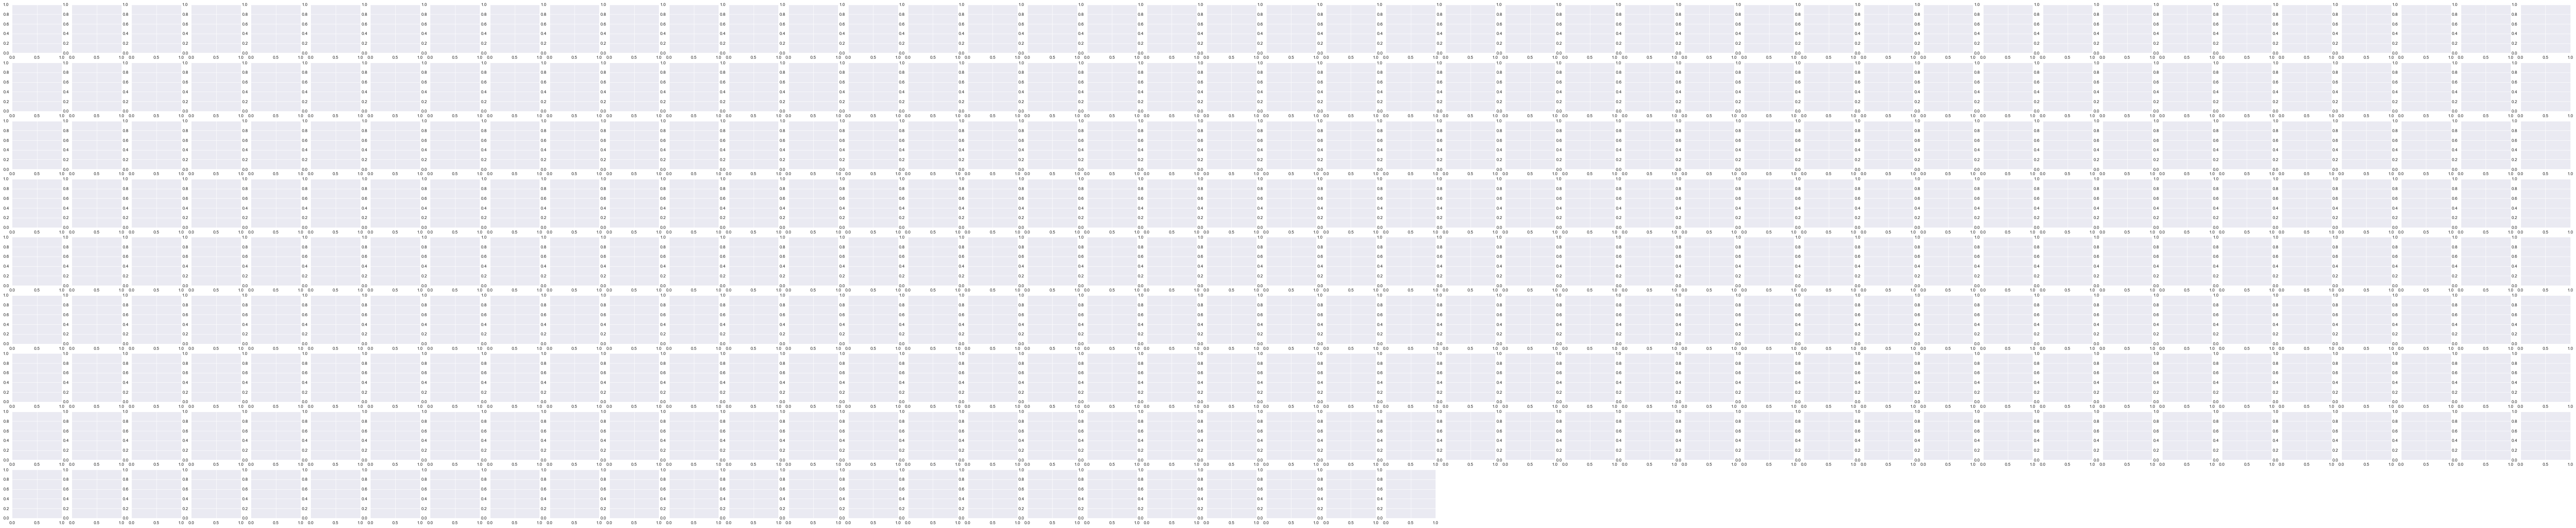

In [19]:
sns.pairplot(df_1)
plt.show()

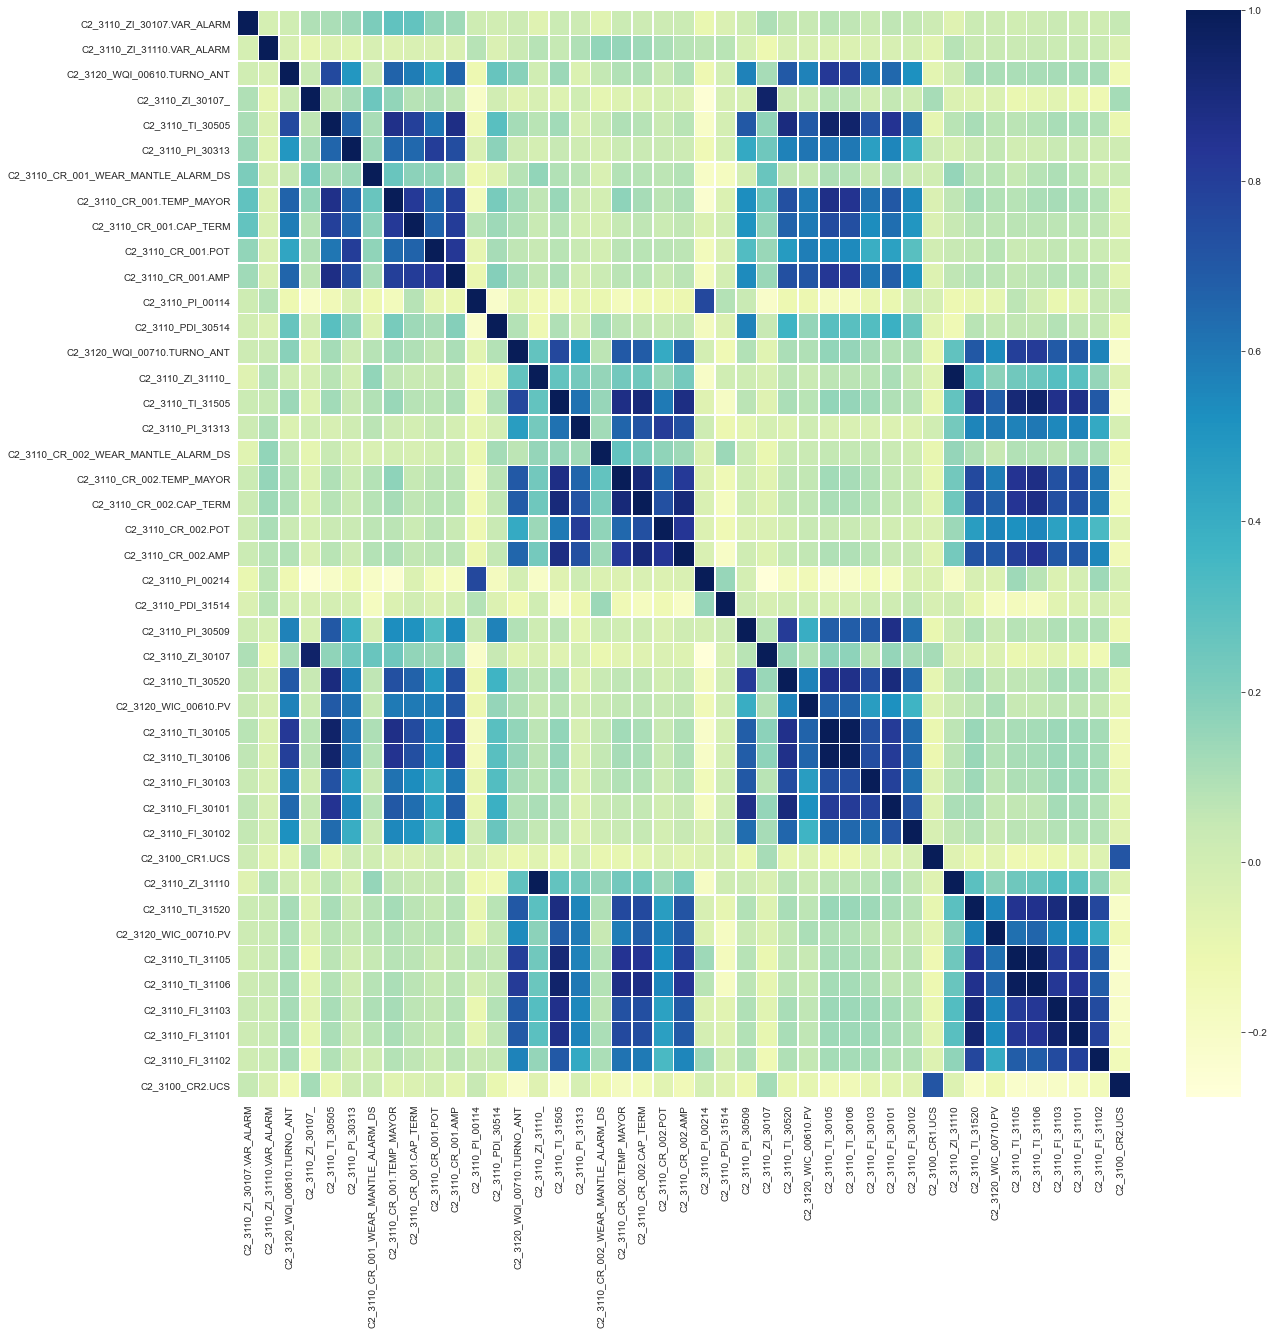

In [20]:
plt.figure(figsize=(20,20))
ax_21=sns.heatmap(df_1.corr(),linewidths=.5,cmap="YlGnBu")
plt.show()

In [24]:
fig = ax_21.get_figure()
fig.savefig("heatmap.png")

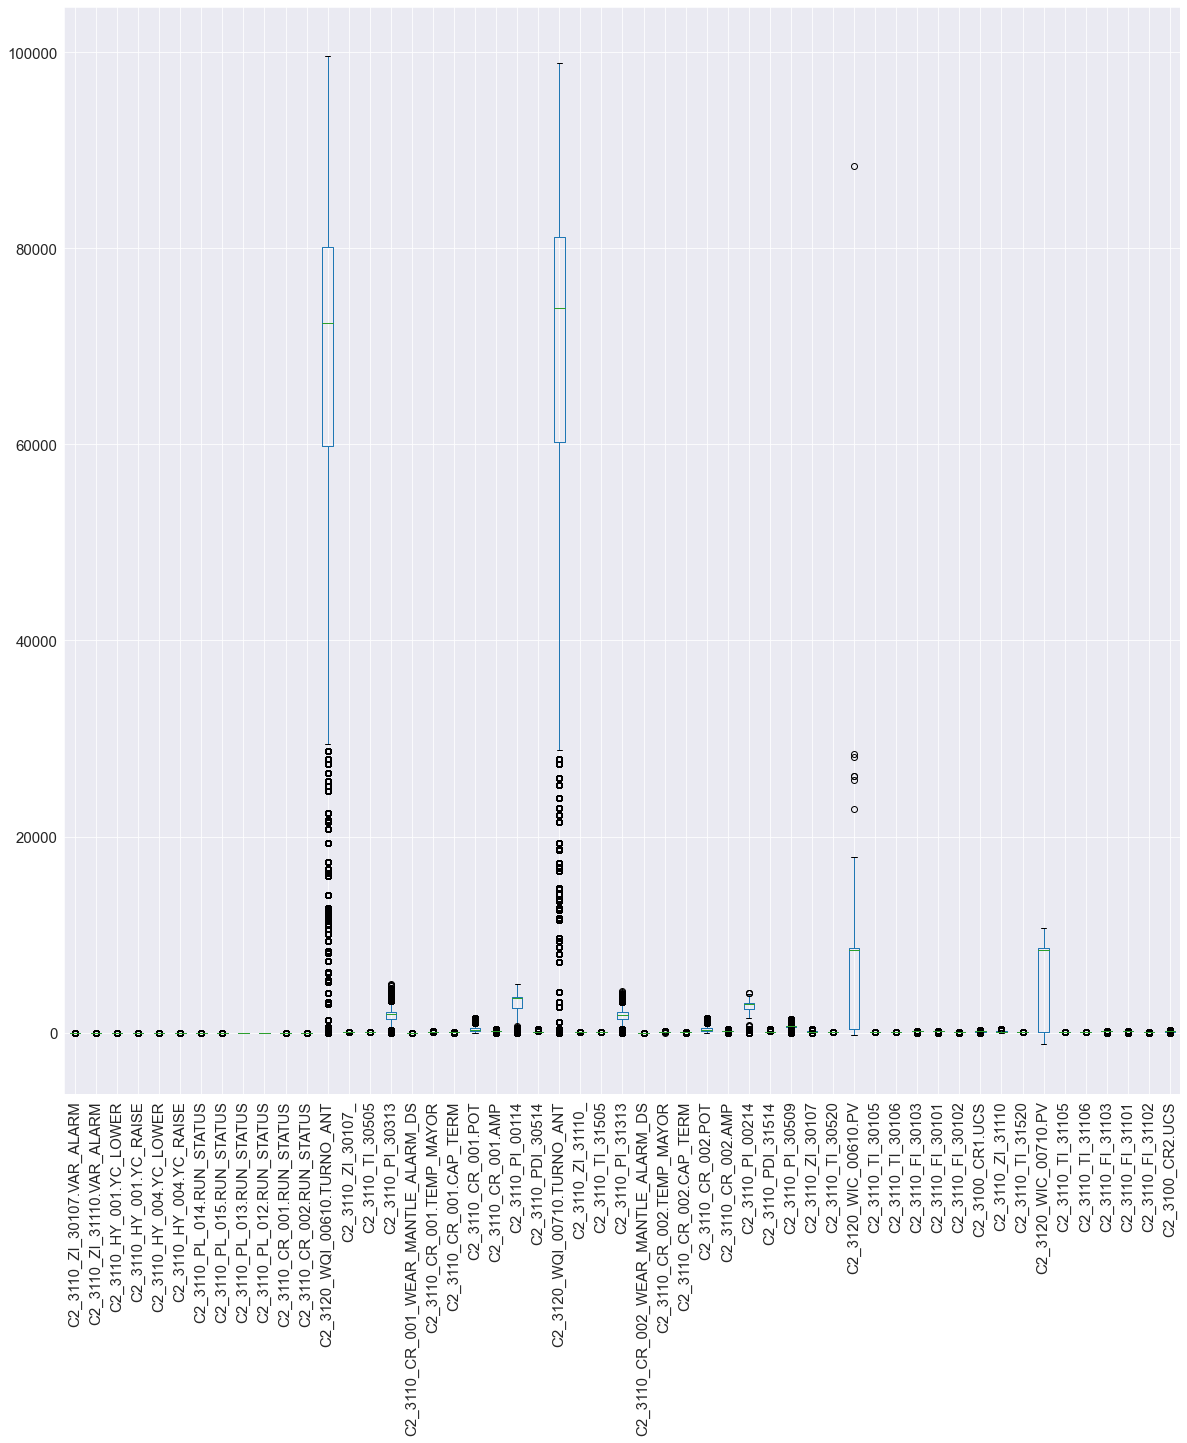

In [33]:
df.boxplot(rot=90,fontsize=15,figsize=(20, 20))
#plt.title('Gráfico de Esfuerzos por WSG',fontsize=15)
#plt.ylabel('Esfeuerzo en MPa',fontsize=15)
plt.show()

In [34]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [35]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [36]:
import xgboost
import shap

In [37]:
a2=[
 'C2_3110_ZI_30107.VAR_ALARM',
 'C2_3110_ZI_31110.VAR_ALARM',
 'C2_3120_WQI_00610.TURNO_ANT',
 'C2_3110_ZI_30107_',
 'C2_3110_PI_30313',
 'C2_3110_CR_001_WEAR_MANTLE_ALARM_DS',
 'C2_3110_CR_001.TEMP_MAYOR',
 'C2_3110_CR_001.CAP_TERM',
 'C2_3110_CR_001.POT',
 'C2_3110_CR_001.AMP',
 'C2_3110_PI_00114',
 'C2_3110_PDI_30514',
 'C2_3110_ZI_31110_',
 'C2_3110_PI_00214',
 'C2_3110_PDI_31514',
 'C2_3110_PI_30509',
 'C2_3110_ZI_30107',
 'C2_3110_TI_30520',
 'C2_3120_WIC_00610.PV',
 'C2_3110_TI_30105',
 'C2_3110_TI_30106',
 'C2_3110_FI_30103',
 'C2_3110_FI_30101',
 'C2_3110_FI_30102',
 'C2_3100_CR1.UCS',
 ]

a3=['C2_3110_TI_30505']
b=df_1.loc[:,a2]
c=df_1.loc[:,a3]

In [38]:
model = xgboost.XGBRegressor().fit(b, c)

In [39]:
explainer = shap.Explainer(model)

In [41]:
shap_values = explainer(b) # calculo de importancias

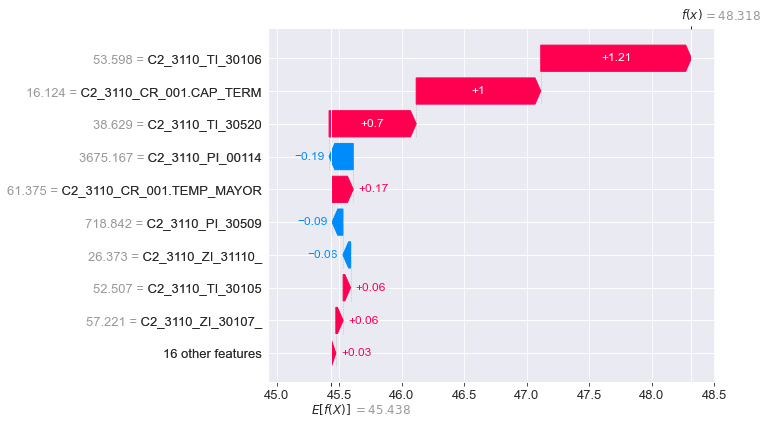

In [42]:
shap.plots.waterfall(shap_values[0])

In [ ]:
shap.initjs()

shap.plots.force(shap_values[0])